# Завдання на практичну роботу #4

## Частина перша - Бінарна класифікація (Binary Classification):

Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Бінарна класифікація: Де модель визначає, чи належить вхідний зразок одному з двох класів, наприклад, "позитивний" або "негативний", "хворий" або "здоровий".

### Підготовка даних

Імпорт бібліотек

In [269]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor


Завантаження даних з файлу

In [270]:
# Завантаження даних
data = pd.read_csv('classification_dataset.csv')

In [271]:
print(data.head())

   Feature1  Feature2  Target
0 -0.872929  0.013042       1
1  1.312935  2.770534       1
2  2.340428  2.420996       1
3  2.294548 -0.404380       1
4  0.944105  0.477241       1


Перевірка на пропущені значення


In [272]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

# Нема

Series([], dtype: int64)


In [285]:
data['Target'].value_counts()

Target
1    100
0    100
Name: count, dtype: int64

Cross-Validation

In [273]:
# Вибір цільової змінної (відгуку) та предикторів

np.random.seed(42)

X = data.drop(['Target'], axis=1)
y = data['Target']

clf = RandomForestClassifier(n_estimators=100)
# Перехресна оцінка RandomForestClassifier
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')           # Accuracy
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')    # Precision
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')          # Recall
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')                  # F1
cv_r2 = cross_val_score(clf, X, y, cv=5, scoring='r2')                  # R2
cv_mae = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')    # mean absolute error
cv_mse = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')    # mean squared error
mean_accuracy = scores.mean()
std_accuracy = scores.std()

# lr_model = LogisticRegression()
lr_model = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=200)
# Перехресна оцінка LogisticRegression
scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')           # Accuracy
cv_precision_lr = cross_val_score(lr_model, X, y, cv=5, scoring='precision')    # Precision
cv_recall_lr = cross_val_score(lr_model, X, y, cv=5, scoring='recall')          # Recall
cv_f1_lr = cross_val_score(lr_model, X, y, cv=5, scoring='f1')                  # F1
cv_r2_lr = cross_val_score(lr_model, X, y, cv=5, scoring='r2')                  # R2
cv_mae_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_absolute_error')    # mean absolute error
cv_mse_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')    # mean squared error
mean_accuracy_lr = scores_lr.mean()
std_accuracy_lr = scores_lr.std()

dt_model = DecisionTreeRegressor()
# Перехресна оцінка DecisionTreeRegressor
scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')           # Accuracy
cv_precision_dt = cross_val_score(dt_model, X, y, cv=5, scoring='precision')    # Precision
cv_recall_dt = cross_val_score(dt_model, X, y, cv=5, scoring='recall')          # Recall
cv_f1_dt = cross_val_score(dt_model, X, y, cv=5, scoring='f1')                  # F1
cv_r2_dt = cross_val_score(dt_model, X, y, cv=5, scoring='r2')                  # R2
cv_mae_dt = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_absolute_error')    # mean absolute error
cv_mse_dt = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')    # mean squared error
mean_accuracy_dt = scores_dt.mean()
std_accuracy_dt = scores_dt.std()



In [274]:
print('\n---For Random Forest Classifier---')
print(f'Середня Точність: {mean_accuracy*100:.2f}%')
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))
print(f'Precision: {np.mean(cv_precision):.2f}')
print(f'Recall: {np.mean(cv_recall):.2f}')
print(f'F-1: {np.mean(cv_f1):.2f}')
print(f'R-2: {np.mean(cv_r2):.2f}')
print(f'Mean Absolute Error (higher=better): {np.mean(cv_mae):.2f}')
print(f'Mean Squared Error (higher=better): {np.mean(cv_mse):.2f}')

print('\n---For Logistic Regression---')
print(f'Середня Точність: {mean_accuracy_lr*100:.2f}%')
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy_lr))
print(f'Precision: {np.mean(cv_precision_lr):.2f}')
print(f'Recall: {np.mean(cv_recall_lr):.2f}')
print(f'F-1: {np.mean(cv_f1_lr):.2f}')
print(f'R-2: {np.mean(cv_r2_lr):.2f}')
print(f'Mean Absolute Error (higher=better): {np.mean(cv_mae_lr):.2f}')
print(f'Mean Squared Error (higher=better): {np.mean(cv_mse_lr):.2f}')

print('\n---Decision Tree Regressor---')
print(f'Середня Точність: {mean_accuracy_dt*100:.2f}%')
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy_dt))
print(f'Precision: {np.mean(cv_precision_dt):.2f}')
print(f'Recall: {np.mean(cv_recall_dt):.2f}')
print(f'F-1: {np.mean(cv_f1_dt):.2f}')
print(f'R-2: {np.mean(cv_r2_dt):.2f}')
print(f'Mean Absolute Error (higher=better): {np.mean(cv_mae_dt):.2f}')
print(f'Mean Squared Error (higher=better): {np.mean(cv_mse_dt):.2f}')


---For Random Forest Classifier---
Середня Точність: 84.00%
Стандартне відхилення точності: 0.06
Precision: 0.86
Recall: 0.84
F-1: 0.84
R-2: 0.36
Mean Absolute Error (higher=better): -0.14
Mean Squared Error (higher=better): -0.16

---For Logistic Regressionr---
Середня Точність: 83.50%
Стандартне відхилення точності: 0.06
Precision: 0.84
Recall: 0.84
F-1: 0.83
R-2: 0.34
Mean Absolute Error (higher=better): -0.16
Mean Squared Error (higher=better): -0.16

---Decision Tree Regressor---
Середня Точність: 80.00%
Стандартне відхилення точності: 0.05
Precision: 0.81
Recall: 0.83
F-1: 0.79
R-2: 0.21
Mean Absolute Error (higher=better): -0.20
Mean Squared Error (higher=better): -0.20


In [280]:
y_pred_cv = cross_val_predict(clf, X, y, cv=5) 
conf_matrix = confusion_matrix(y, y_pred_cv)
print("Матриця плутанини Random Forest Classifier:")
print(conf_matrix)

y_pred_cv_lr = cross_val_predict(lr_model, X, y, cv=5) 
conf_matrix_lr = confusion_matrix(y, y_pred_cv_lr)
print("\nМатриця плутанини Logistic Regressionr:")
print(conf_matrix_lr)

y_pred_cv_dt = cross_val_predict(dt_model, X, y, cv=5) 
conf_matrix_dt = confusion_matrix(y, y_pred_cv_dt)
print("\nМатриця плутанини Decision Tree Regressor:")
print(conf_matrix_dt)


Матриця плутанини Random Forest Classifier:
[[84 16]
 [15 85]]

Матриця плутанини Logistic Regressionr:
[[83 17]
 [16 84]]

Матриця плутанини Decision Tree Regressor:
[[80 20]
 [18 82]]


In [283]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
sns.histplot(lr_model['Target'], kde=True)
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної')
plt.show()

TypeError: 'LogisticRegression' object is not subscriptable

<Figure size 800x600 with 0 Axes>

### Тренування, оцінка моделей

Тренування моделей

Оцінка точності моделей

In [ ]:
# # Оцінка точності Логістичної моделі 
# accuracy = accuracy_score(y_test, y_pred_lr)
# recall = recall_score(y_test, y_pred_lr)
# f1 = f1_score(y_test, y_pred_lr)
# roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
# conf_matrix = confusion_matrix(y, y_pred_lr)

# print("---Для Логістичної регресії---")
# print("Точність: {:.2f}".format(accuracy))
# print("Відгук: {:.2f}".format(recall))
# print("F1-середнє: {:.2f}".format(f1))
# print("AUC-ROC: {:.2f}".format(roc_auc))
# print("Матриця плутанини:")
# print(conf_matrix)


# # Оцінка точності моделі Дерева рішень
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# recall_dt = recall_score(y_test, y_pred_dt)
# f1_dt = f1_score(y_test, y_pred_dt)
# # roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
# conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# print("\n\n---Для моделі Дерева рішень---")
# print("Точність: {:.2f}".format(accuracy_dt))
# print("Відгук: {:.2f}".format(recall_dt))
# print("F1-середнє: {:.2f}".format(f1_dt))
# # print("AUC-ROC: {:.2f}".format(roc_auc_dt))
# print("Матриця плутанини:")
# print(conf_matrix_dt)

NameError: name 'y_test' is not defined

### Візуалізація

Далі використовую модель Логістичної регресії (має кращі показники)

Гістограма

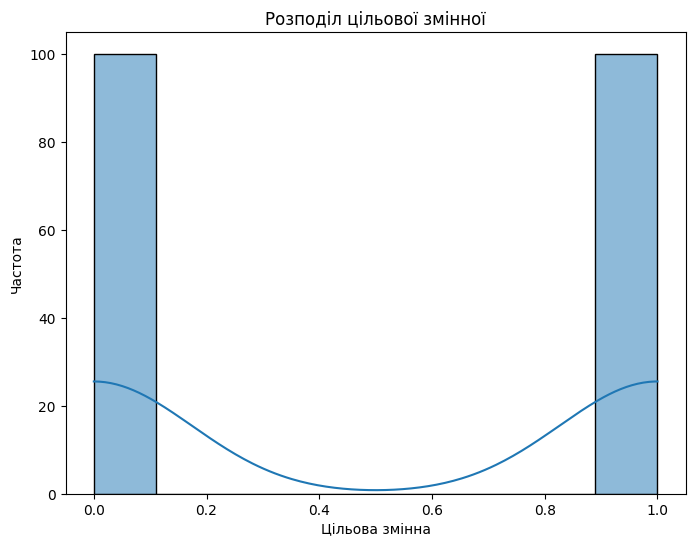

In [ ]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
sns.histplot(data['Target'], kde=True)
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної')
plt.show()

Матриця кореляції

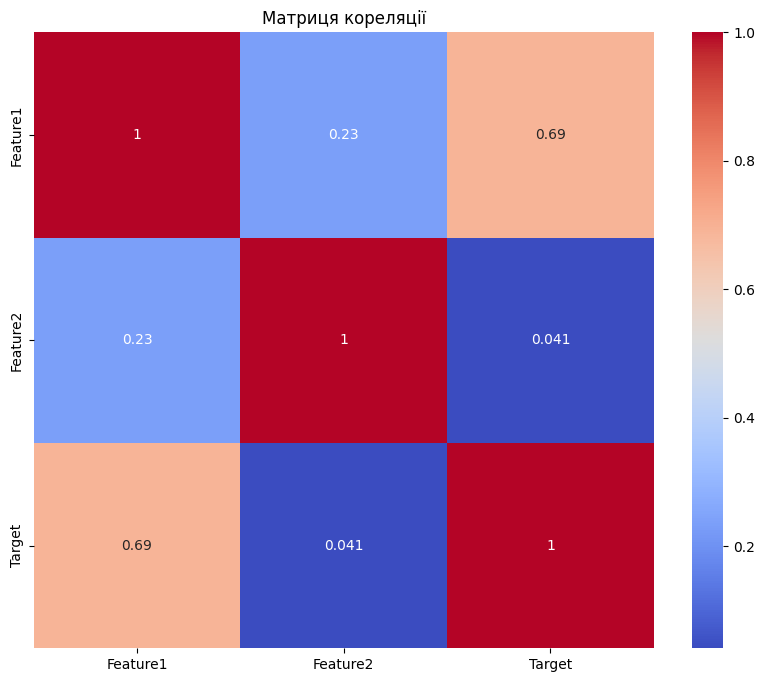

In [ ]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

NameError: name 'y_test' is not defined

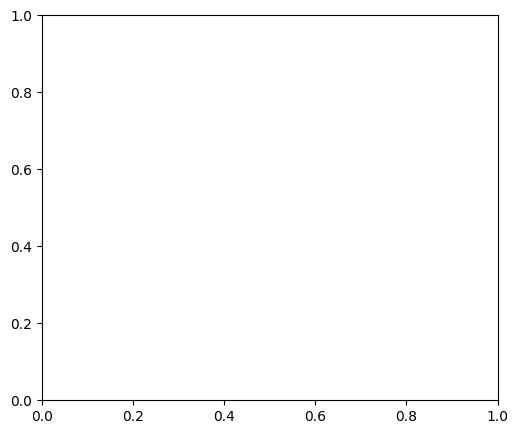

In [ ]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred_lr), max(y_pred_lr)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії")